In [1]:
from demopy.notebook_imports import *
import numpy as np
import pandas as pd
import calmap
from mpldatacursor import datacursor

In [2]:
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

999

In [3]:
container([
    to_output(
        Markdown("### Sample of Markdown files ... in tabs ...")
    ),
    tab_with_content({
        "1": to_output(Markdown(filename="samples/1.md")),
        "2": to_output(Markdown(filename="samples/2.md")),
        "3": to_output(Markdown(filename="samples/3.md")),
    })
])

In [5]:
# Create random daily logins 
np.random.seed(sum(map(ord, 'calmap')))

# Logins in the middle of the year ... 
daily_logins = [0]*175 + [np.random.choice([0,0,0,1,2,3,], 1)[0] for x in [0]*30] + [0]*175
days_this_year = pd.date_range('1/1/2017', periods=len(daily_logins), freq='D')

<IPython.core.display.Javascript object>


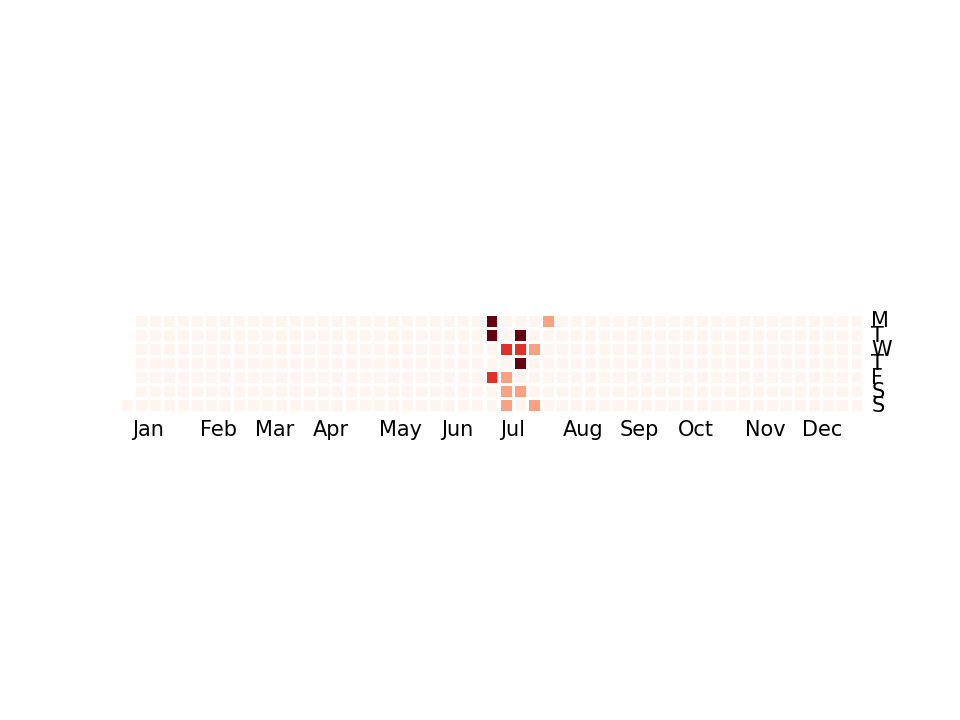

/Users/oeid/Workspace/binaries/miniconda3/envs/py3/lib/python3.7/site-packages/calmap/__init__.py:221: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  for i in monthticks])


matplotlib.axes._subplots.AxesSubplot

In [6]:
%matplotlib notebook
events = pd.Series(map(lambda x: x * 100, daily_logins), index=days_this_year)
x = calmap.yearplot(events, year=2017, daylabels='MTWTFSS')
type(x)

<IPython.core.display.Javascript object>


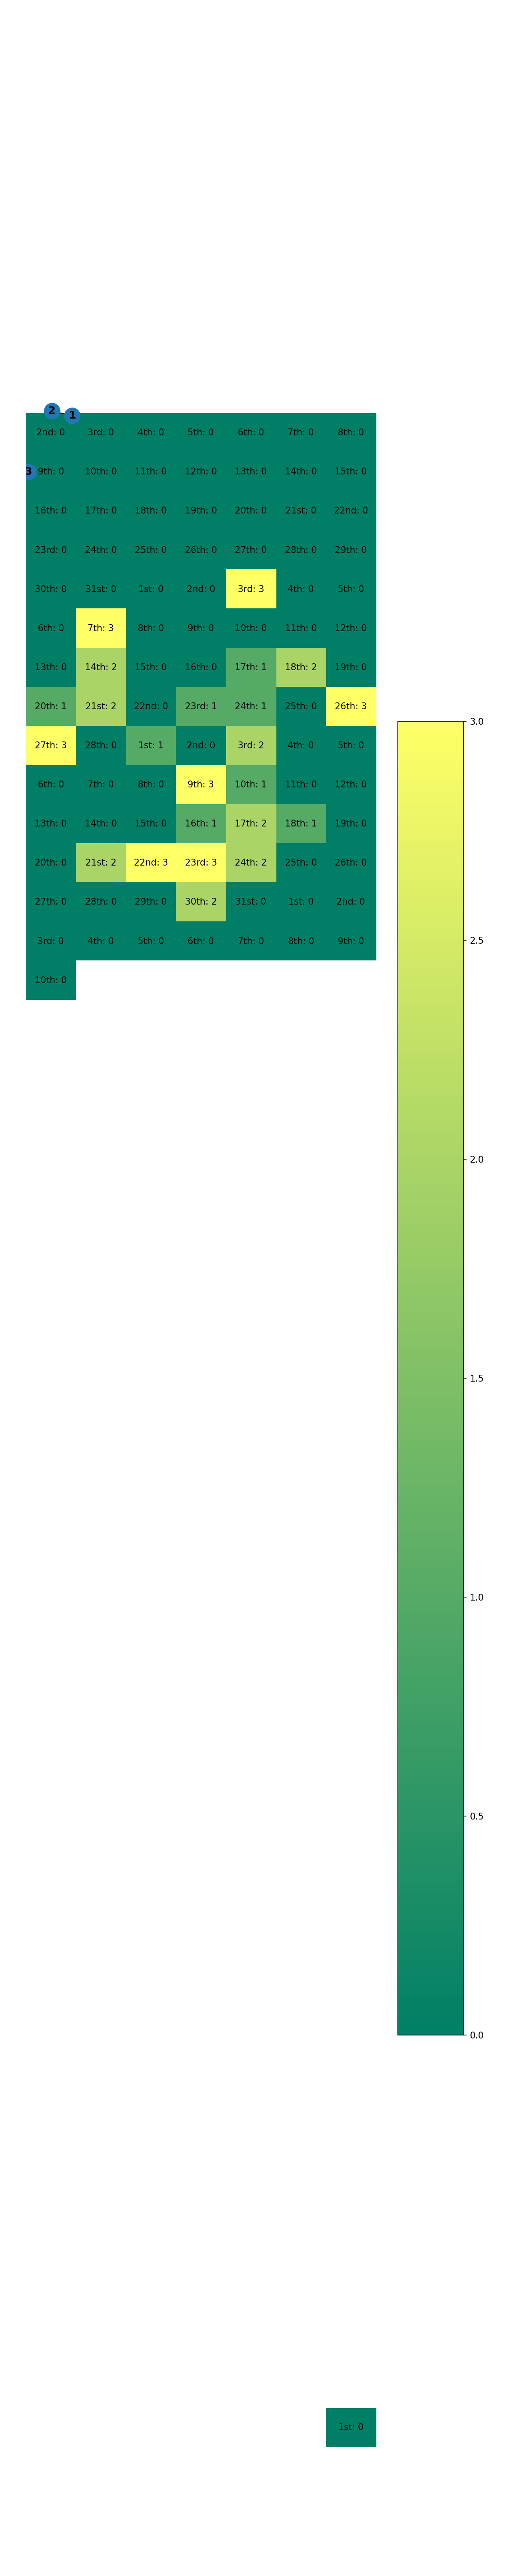

In [7]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np


def generate_data():
    num = 100
    data = np.random.randint(0, 20, num)
    start = dt.datetime(2015, 3, 13)
    dates = [start + dt.timedelta(days=i) for i in range(num)]
    return dates, data


def extract_tuple_of_weekOfYear_and_dayOfWeek(date):
    return date.isocalendar()[1:]


def calendar_array(dates, data):
    i, j = zip(*[extract_tuple_of_weekOfYear_and_dayOfWeek(d) for d in dates])
    i = np.array(i) - min(i)
    # i becomes the list of the week of the year for all the data points relative to the smallest week of the year
    j = np.array(j) - 1
    # j becomes the list of the day of the week for all the data points minus 1
    ni = max(i) + 1
    # we are creating as many rows as there are weeks in the time period we specified plus one, and 7 columns, one per day ...
    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar


def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap='summer')
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    ax.figure.colorbar(im, spacing='proportional')

    
def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]

    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, "{}: {}".format(ordinal(int(day)),int(calendar[i,j])), ha='center', va='center')

    ax.set(xticks=np.arange(7), 
           xticklabels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
    ax.xaxis.tick_top()

def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                             'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    months = np.array([d.month for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in uniq_months]
    labels = [month_labels[m - 1] for m in uniq_months]
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90)

# much code can be improved by using a datastructe.
def ordinal(num):
    SUFFIXES = {1: 'st', 2: 'nd', 3: 'rd'}
    # I'm checking for 10-20 because those are the digits that
    # don't follow the normal counting scheme. 
    if 10 <= num % 100 <= 20:
        suffix = 'th'
    else:
        # the second parameter is a default.
        suffix = SUFFIXES.get(num % 10, 'th')
    return str(num) + suffix

daily_logins = [0]*30 + [np.random.choice([0,0,0,0,0,0,1,2,3,], 1)[0] for x in [0]*60] + [0]*10
days_this_year = pd.date_range('1/1/2017', periods=len(daily_logins), freq='D')
dates, data = days_this_year, daily_logins

# datacursor(display='single',formatter='Logins: {z}'.format)

fig, ax = plt.subplots(figsize=(8, 40), gridspec_kw={"left":.05,"bottom":.05,"wspace":0})
calendar_heatmap(ax, dates, data)
ax.set_aspect(aspect="auto", anchor="NW")
plt.show()

# calendar_array(dates, data)
# https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

In [8]:
# Redering JSON ...

RenderJSON({
    "dict": {
        "a": {
            "b": {
                "c": {
                }
            }
        }
    },
    "list-in-list": [
        [
            x for x in range(0,100)
        ]
    ]
})


In [9]:
import pycandela

data = [
    dict(name='Do this', level=1, start=0, end=5),
    dict(name='This part 1', level=2, start=0, end=3),
    dict(name='This part 2', level=2, start=3, end=5),
    dict(name='Then that', level=1, start=5, end=15),
    dict(name='That part 1', level=2, start=5, end=10),
    dict(name='That part 2', level=2, start=10, end=15)
];
pycandela.components.GanttChart(
    data=data, label='name',
    start='start', end='end', level='level',
    width=700, height=200
)

In [11]:
import requests
data = requests.get('https://raw.githubusercontent.com/vega/vega-datasets/master/data/iris.json').json()

import pycandela
pycandela.components.ScatterPlot(
    data=data, color='species', x='sepalLength', y='sepalWidth')

In [14]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1,2)])
nx.readwrite.cytoscape_data(G)

{'data': [],
 'directed': False,
 'multigraph': False,
 'elements': {'nodes': [{'data': {'id': '1', 'value': 1, 'name': '1'}},
   {'data': {'id': '2', 'value': 2, 'name': '2'}},
   {'data': {'id': '3', 'value': 3, 'name': '3'}}],
  'edges': [{'data': {'source': 1, 'target': 2}}]}}

In [ ]:
# display(Javascript(filename="draw.js"))
# display(Javascript("""
#     (function(element){
#         require(['draw'], function(draw) {
#             draw(element.get(0));
#         });
#     })(element);
# """
# ))

In [ ]:
# %%javascript
# requirejs.config({
#   paths: {
#     'jquery': 'https://code.jquery.com/jquery-1.12.4.min',
#     'cytoscape': 'https://cdnjs.cloudflare.com/ajax/libs/cytoscape/2.7.9/cytoscape.min',
#     'cytoscape-panzoom': 'https://cdnjs.cloudflare.com/ajax/libs/cytoscape-panzoom/2.4.0/cytoscape-panzoom.min',
#     'bootstrap': 'https://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/js/bootstrap.min.js',
#   },
#   shim: {
#     'bootstrap': ['jquery']
#   }
# });

In [15]:
html_div = '<div id="cy_id"></div>'

script_code = '''

    requirejs.config({
      paths: {
        'cytoscape': 'https://js.cytoscape.org/js/cytoscape.min'
      },
      shim: {
        'cytoscape': {
            'exports': 'cytoscape'
        }
      }
    });

    requirejs(
        ['cytoscape'], 
        function(cytoscape){
            fetch('http://js.cytoscape.org/demos/labels/cy-style.json')
            .then(function(res) {
                return res.json()
            })
            .then(function(style) {
                var cy = cytoscape({
                  container: document.getElementById('cy_id'),
                  style: style,
                  elements: [
                    { data: { label: 'top left' }, classes: 'top-left' },
                    { data: { label: 'top center' }, classes: 'top-center' },
                    { data: { label: 'top right' }, classes: 'top-right' },
                    { data: { label: 'center left' }, classes: 'center-left' },
                    { data: { label: 'center center' }, classes: 'center-center' },
                    { data: { label: 'center right' }, classes: 'center-right' },
                    { data: { label: 'bottom left' }, classes: 'bottom-left' },
                    { data: { label: 'bottom center' }, classes: 'bottom-center' },
                    { data: { label: 'bottom right' }, classes: 'bottom-right' },
                    { data: { label: 'multiline auto foo bar baz' }, classes: 'multiline-auto' },
                    { data: { label: 'outline' }, classes: 'outline' },
                    { data: { id: 'ar-src' } },
                    { data: { id: 'ar-tgt' } },
                    { data: { source: 'ar-src', target: 'ar-tgt', label: 'autorotate (move my nodes)' }, classes: 'autorotate' },
                    { data: { label: 'background' }, classes: 'background' }
                  ]
                });
            });
        }
    );
'''

# display(HTML("<script src='https://raw.githubusercontent.com/cytoscape/cytoscape.js/cd4c675247d526ee108737325165006d8861b02b/dist/cytoscape.min.js'></script>"), display_id='cy')
# display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/cytoscape/2.7.9/cytoscape.min'></script>"), display_id='cy')

display(Javascript(script_code), display_id="cy_id", update=True)
display(HTML(html_div), display_id='cy_id', update=True)

<DisplayHandle display_id=cy_id>

In [16]:
from py2cytoscape.cytoscapejs import render

<IPython.core.display.Javascript object>

In [17]:
render(nx.readwrite.cytoscape_data(G))

In [18]:
 nx.draw(G, with_labels=True, font_weight='bold')

In [19]:

import pygraphviz as pgv

A=pgv.AGraph()

A.add_edge(1,2)
A.add_edge(2,3)
A.add_edge(1,3)

# print(A.string()) # print to screen
A.layout()

# B.layout() # layout with default (neato)
display(Image(A.draw(format="jpeg")))

ModuleNotFoundError: No module named 'pygraphviz'

In [ ]:
# display_id="here", update=True

In [20]:
import ipywidgets as widgets
from traitlets import Unicode, validate


class CytoscapeWidget(widgets.DOMWidget):
    _view_name = Unicode('CytoscapeView').tag(sync=True)
    _view_module = Unicode('cytoscapewidget').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)
    value = Unicode('Hello World!').tag(sync=True)


In [21]:
%%javascript

// 'cytoscape': 'https://js.cytoscape.org/js/cytoscape.min.js'
// 'cytoscape': 'https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.2.16/cytoscape'
// 'https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.5.1/cytoscape.min',

require.config({
  paths: {
    'cytoscape': 'https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.2.15/cytoscape.min'
  },
  shim: {
    'cytoscape': {
        exports: 'cytoscape'
    }
  },
  waitSeconds: 30
});

<IPython.core.display.Javascript object>

In [22]:
%%javascript
require.undef('cytoscapewidget');

// define('cytoscapewidget', ["@jupyter-widgets/base"], function(widgets) {
define('cytoscapewidget', ["@jupyter-widgets/base", "cytoscape"], function(widgets, cytoscape) {
    var CytoscapeView = widgets.DOMWidgetView.extend({
        render: function() {
            fetch('https://js.cytoscape.org/demos/labels/cy-style.json')
            .then(function(res) {
                return res.json()
            })
            .then(function(style) {
                element.get(0).id = "cy";
                var cy = cytoscape({
                  container: element.get(0),
                  style: style,
                  elements: [
                    { data: { label: 'top left' }, classes: 'top-left' },
                    { data: { label: 'top center' }, classes: 'top-center' },
                    { data: { label: 'top right' }, classes: 'top-right' },
                    { data: { label: 'center left' }, classes: 'center-left' },
                    { data: { label: 'center center' }, classes: 'center-center' },
                    { data: { label: 'center right' }, classes: 'center-right' },
                    { data: { label: 'bottom left' }, classes: 'bottom-left' },
                    { data: { label: 'bottom center' }, classes: 'bottom-center' },
                    { data: { label: 'bottom right' }, classes: 'bottom-right' },
                    { data: { label: 'multiline auto foo bar baz' }, classes: 'multiline-auto' },
                    { data: { label: 'outline' }, classes: 'outline' },
                    { data: { id: 'ar-src' } },
                    { data: { id: 'ar-tgt' } },
                    { data: { source: 'ar-src', target: 'ar-tgt', label: 'autorotate (move my nodes)' }, classes: 'autorotate' },
                    { data: { label: 'background' }, classes: 'background' }
                  ]
                });
            });
        }
//        render: function() {
//             this.value_changed();
//             this.model.on('change:value', this.value_changed, this);
//         },

//         value_changed: function() {
//             this.el.textContent = this.model.get('value');
//         },
    });

    return {
        CytoscapeView : CytoscapeView
    };
});

<IPython.core.display.Javascript object>

In [23]:
CytoscapeWidget()

CytoscapeWidget()

In [24]:
x.value = "asdf"

In [25]:
# Date Stuff
pd.date_range('1/1/2017', periods=1, freq='D')[0].isocalendar()
print([extract_tuple_of_weekOfYear_and_dayOfWeek(d) for d in dates])
# list(zip(*[extract_tuple_of_weekOfYear_and_dayOfWeek(d) for d in dates]))

[(52, 7), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (12, 6), (12, 7), (13, 1), (13, 2), (13, 3), (13, 4), (13, 5), (13, 6), (13, 7), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (14, 6), (14, 7), (15, 1)]
